구글 코랩에서 한글 문제 해결
- 아래 코드 설치를 한다.
- 코랩 런타임 -> 런타임 다시 시작한다

다시 임포트 하는 과정이 필요한듯

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (6,500 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

###구글 드라이브 연동

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/colab/dataanalysis

Mounted at /content/drive
/content/drive/MyDrive/colab/dataanalysis


### import   

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

https://kosis.kr/search/search.do

In [3]:
df_kosis = pd.read_csv('./data/행정구역_시군구_별__성별_인구수_2020.csv', encoding='cp949') # UnicodeDecodeError:  -> 유니코드로 인코딩이 안된다.
df_kosis.head()

,행정구역(시군구)별,2020,2020.1,2020.2
0,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명)
1,전국,51829023,25841029,25987994
2,서울특별시,9668465,4701723,4966742
3,부산광역시,3391946,1661000,1730946
4,대구광역시,2418346,1193109,1225237


In [4]:
df_kosis.tail()

,행정구역(시군구)별,2020,2020.1,2020.2
14,전라북도,1804104,896874,907230
15,전라남도,1851549,930615,920934
16,경상북도,2639422,1329211,1310211
17,경상남도,3340216,1681423,1658793
18,제주특별자치도,674635,338609,336026


In [5]:
df_kosis.sample()

,행정구역(시군구)별,2020,2020.1,2020.2
4,대구광역시,2418346,1193109,1225237


In [6]:
df_kosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역(시군구)별  19 non-null     object
 1   2020        19 non-null     object
 2   2020.1      19 non-null     object
 3   2020.2      19 non-null     object
dtypes: object(4)
memory usage: 736.0+ bytes


In [7]:
df_kosis.describe()

,행정구역(시군구)별,2020,2020.1,2020.2
count,19,19,19,19
unique,19,19,19,19
top,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명)
freq,1,1,1,1


In [8]:
# 행정구역이 몇개로 나누어져있는지 확인
df_kosis.columns # 1이면 남자 2면 여자

Index(['행정구역(시군구)별', '2020', '2020.1', '2020.2'], dtype='object')

In [9]:
df_kosis['행정구역(시군구)별'].unique()

array(['행정구역(시군구)별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시',
       '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도',
       '전라남도', '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [10]:
# 0번째 인덱스의 row 제거(행정구역(시군구)별 제거)
df = df_kosis[df_kosis['행정구역(시군구)별']!='행정구역(시군구)별'].copy()
df.head()

,행정구역(시군구)별,2020,2020.1,2020.2
1,전국,51829023,25841029,25987994
2,서울특별시,9668465,4701723,4966742
3,부산광역시,3391946,1661000,1730946
4,대구광역시,2418346,1193109,1225237
5,인천광역시,2942828,1473943,1468885


In [11]:
# 전국 row 제거 : 전국	51829023	25841029	25987994
df = df[df['행정구역(시군구)별' ]!= '전국'].copy()
df.head()

,행정구역(시군구)별,2020,2020.1,2020.2
2,서울특별시,9668465,4701723,4966742
3,부산광역시,3391946,1661000,1730946
4,대구광역시,2418346,1193109,1225237
5,인천광역시,2942828,1473943,1468885
6,광주광역시,1450062,717348,732714


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2 to 18
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역(시군구)별  17 non-null     object
 1   2020        17 non-null     object
 2   2020.1      17 non-null     object
 3   2020.2      17 non-null     object
dtypes: object(4)
memory usage: 680.0+ bytes


In [13]:
df['2020']

2      9668465
3      3391946
4      2418346
5      2942828
6      1450062
7      1463882
8      1136017
9       355831
10    13427014
11     1542840
12     1600837
13     2121029
14     1804104
15     1851549
16     2639422
17     3340216
18      674635
Name: 2020, dtype: object

In [14]:
# 행정구역(시군구)별, 2020 대상의 데이터를 가져오기

# df_2020 = df[['행정구역(시군구)별','2020']] # 행일 때 슬라이싱 가능함. 컬럼일때는 패싱 인덱싱을 이용해서 가지고 올 수 있다.

# df_2020 = df.iloc[:,0:2]

# df_2020 = df.iloc[:,[0:1]]

df_2020 = df.loc[:,'행정구역(시군구)별':'2020']


df_2020 #2020만 저장되어 있는 상태

,행정구역(시군구)별,2020
2,서울특별시,9668465
3,부산광역시,3391946
4,대구광역시,2418346
5,인천광역시,2942828
6,광주광역시,1450062
7,대전광역시,1463882
8,울산광역시,1136017
9,세종특별자치시,355831
10,경기도,13427014
11,강원도,1542840


In [15]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2 to 18
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역(시군구)별  17 non-null     object
 1   2020        17 non-null     object
dtypes: object(2)
memory usage: 408.0+ bytes


In [16]:
print(dir(plt))

['Annotation', 'Arrow', 'Artist', 'AutoLocator', 'Axes', 'Button', 'Circle', 'Figure', 'FigureCanvasBase', 'FixedFormatter', 'FixedLocator', 'FormatStrFormatter', 'Formatter', 'FuncFormatter', 'GridSpec', 'IndexLocator', 'Line2D', 'LinearLocator', 'Locator', 'LogFormatter', 'LogFormatterExponent', 'LogFormatterMathtext', 'LogLocator', 'MaxNLocator', 'MultipleLocator', 'Normalize', 'NullFormatter', 'NullLocator', 'Number', 'PolarAxes', 'Polygon', 'Rectangle', 'ScalarFormatter', 'Slider', 'Subplot', 'SubplotTool', 'Text', 'TickHelper', 'Widget', '_INSTALL_FIG_OBSERVER', '_IP_REGISTERED', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_auto_draw_if_interactive', '_backend_mod', '_get_running_interactive_framework', '_interactive_bk', '_log', '_pylab_helpers', '_setp', '_setup_pyplot_info_docstrings', '_show', 'acorr', 'angle_spectrum', 'annotate', 'arrow', 'autoscale', 'autumn', 'axes', 'axhline', 'axhspan', 'axis', 'axvline', 'a

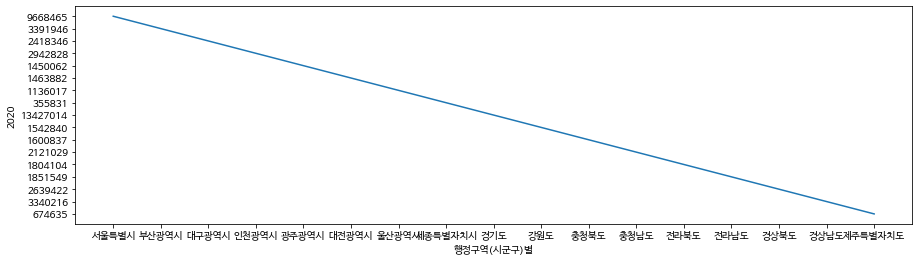

In [17]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(15,4))
# plt.xticks(rotation=45) # 글씨가 겹치지 않도로 약간 회전을 준다.
# plt.plot(df['행정구역(시군구)별'],df['2020'])

# y축에 있는 값은 숫자여야 한다. 근데 지금은 데이터 타입이 오브젝트임
sns.lineplot(data=df,x='행정구역(시군구)별', y='2020')

# plt.plot([1,2,3,4,5])
plt.show()

In [18]:
# '2020', '202.1', '2020.2' 컬럼의 데이터를 int로 변환한다.
df['2020'] = [int(i) for i in df['2020']]
df['2020.1'] = [int(i) for i in df['2020.1']]
df['2020.2'] = [int(i) for i in df['2020.2']]


# 아래 방법은 복잡하니까 사용하지 말자..
# s = [(int(i), int(j), int(k)) for i,j,k in zip(df['2020'],df['2020.1'],df['2020.2'])]
# p = np.array(s)
# df['2020'],df['2020.1'],df['2020.2'] = p[:,0],p[:,1],p[:,2]
# df['2020']
###########
df['2020']

2      9668465
3      3391946
4      2418346
5      2942828
6      1450062
7      1463882
8      1136017
9       355831
10    13427014
11     1542840
12     1600837
13     2121029
14     1804104
15     1851549
16     2639422
17     3340216
18      674635
Name: 2020, dtype: int64

In [19]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2 to 18
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역(시군구)별  17 non-null     object
 1   2020        17 non-null     int64 
 2   2020.1      17 non-null     int64 
 3   2020.2      17 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 680.0+ bytes


In [20]:
df_2020=df[['행정구역(시군구)별','2020']]

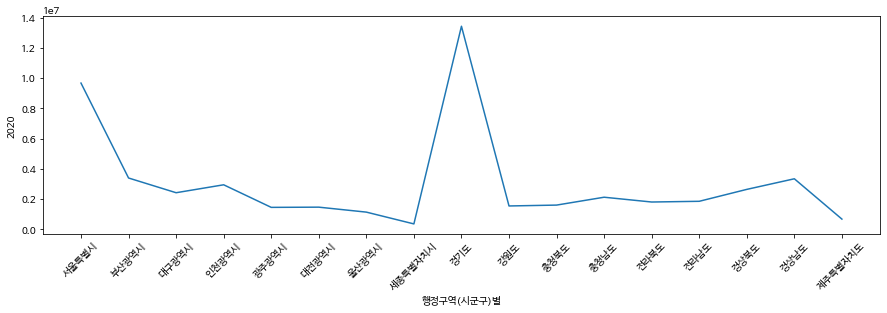

In [21]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(15,4))
plt.xticks(rotation=45) 

#################### 
# plt.plot(df['행정구역(시군구)별'],df['2020'])
# plt.xlabel('행정구역(시군구)별')
# plt.ylabel('2020')
############################

sns.lineplot(data=df,x='행정구역(시군구)별', y='2020')
plt.show()

In [93]:
# plt.rc('font', family='NanumBarunGothic')
# plt.figure(figsize=(15,4))
# plt.xticks(rotation=45) 
# sns.pointplot(data=df, x='행정구역(시군구)별', y='')

출생아수_시도사균슈1997_2021

In [38]:
df_kosis = pd.read_csv('./data/출생아수_시도_시_군_구_1997_2021.csv', encoding='cp949')
df_kosis

,시군구별,1997.01,1997.01.1,1997.01.2,1997.02,1997.02.1,1997.02.2,1997.03,1997.03.1,1997.03.2,1997.04,1997.04.1,1997.04.2,1997.05,1997.05.1,1997.05.2,1997.06,1997.06.1,1997.06.2,1997.07,1997.07.1,1997.07.2,1997.08,1997.08.1,1997.08.2,1997.09,1997.09.1,1997.09.2,1997.10,1997.10.1,1997.10.2,1997.11,1997.11.1,1997.11.2,1997.12,1997.12.1,1997.12.2,1998.01,1998.01.1,1998.01.2,1998.02,1998.02.1,1998.02.2,1998.03,1998.03.1,1998.03.2,1998.04,1998.04.1,1998.04.2,1998.05,1998.05.1,1998.05.2,1998.06,1998.06.1,1998.06.2,1998.07,1998.07.1,1998.07.2,1998.08,1998.08.1,1998.08.2,1998.09,1998.09.1,1998.09.2,1998.10,1998.10.1,1998.10.2,1998.11,1998.11.1,1998.11.2,1998.12,1998.12.1,1998.12.2,1999.01,1999.01.1,1999.01.2,1999.02,1999.02.1,1999.02.2,1999.03,1999.03.1,1999.03.2,1999.04,1999.04.1,1999.04.2,1999.05,1999.05.1,1999.05.2,1999.06,1999.06.1,1999.06.2,1999.07,1999.07.1,1999.07.2,1999.08,1999.08.1,1999.08.2,1999.09,1999.09.1,1999.09.2,1999.10,1999.10.1,1999.10.2,1999.11,1999.11.1,1999.11.2,1999.12,1999.12.1,1999.12.2,2000.01,2000.01.1,2000.01.2,2000.02,2000.02.1,2000.02.2,2000.03,2000.03.1,2000.03.2,2000.04,2000.04.1,2000.04.2,2000.05,2000.05.1,2000.05.2,2000.06,2000.06.1,2000.06.2,2000.07,2000.07.1,2000.07.2,2000.08,2000.08.1,2000.08.2,2000.09,2000.09.1,2000.09.2,2000.10,2000.10.1,2000.10.2,2000.11,2000.11.1,2000.11.2,2000.12,2000.12.1,2000.12.2,2001.01,2001.01.1,2001.01.2,2001.02,2001.02.1,2001.02.2,2001.03,2001.03.1,2001.03.2,2001.04,2001.04.1,2001.04.2,2001.05,2001.05.1,2001.05.2,2001.06,2001.06.1,2001.06.2,2001.07,2001.07.1,2001.07.2,2001.08,2001.08.1,2001.08.2,2001.09,2001.09.1,2001.09.2,2001.10,2001.10.1,2001.10.2,2001.11,2001.11.1,2001.11.2,2001.12,2001.12.1,2001.12.2,2002.01,2002.01.1,2002.01.2,2002.02,2002.02.1,2002.02.2,2002.03,2002.03.1,2002.03.2,2002.04,2002.04.1,2002.04.2,2002.05,2002.05.1,2002.05.2,2002.06,2002.06.1,2002.06.2,2002.07,2002.07.1,2002.07.2,2002.08,2002.08.1,2002.08.2,2002.09,2002.09.1,2002.09.2,2002.10,2002.10.1,2002.10.2,2002.11,2002.11.1,2002.11.2,2002.12,2002.12.1,2002.12.2,2003.01,2003.01.1,2003.01.2,2003.02,2003.02.1,2003.02.2,2003.03,2003.03.1,2003.03.2,2003.04,2003.04.1,2003.04.2,2003.05,2003.05.1,2003.05.2,2003.06,2003.06.1,2003.06.2,2003.07,2003.07.1,2003.07.2,2003.08,2003.08.1,2003.08.2,2003.09,2003.09.1,2003.09.2,2003.10,2003.10.1,2003.10.2,2003.11,2003.11.1,2003.11.2,2003.12,2003.12.1,2003.12.2,2004.01,2004.01.1,2004.01.2,2004.02,2004.02.1,2004.02.2,2004.03,2004.03.1,2004.03.2,2004.04,2004.04.1,2004.04.2,2004.05,2004.05.1,2004.05.2,2004.06,2004.06.1,2004.06.2,2004.07,2004.07.1,2004.07.2,2004.08,2004.08.1,2004.08.2,2004.09,2004.09.1,2004.09.2,2004.10,2004.10.1,2004.10.2,2004.11,2004.11.1,2004.11.2,2004.12,2004.12.1,2004.12.2,2005.01,2005.01.1,2005.01.2,2005.02,2005.02.1,2005.02.2,2005.03,2005.03.1,2005.03.2,2005.04,2005.04.1,2005.04.2,2005.05,2005.05.1,2005.05.2,2005.06,2005.06.1,2005.06.2,2005.07,2005.07.1,2005.07.2,2005.08,2005.08.1,2005.08.2,2005.09,2005.09.1,2005.09.2,2005.10,2005.10.1,2005.10.2,2005.11,2005.11.1,2005.11.2,2005.12,2005.12.1,2005.12.2,2006.01,2006.01.1,2006.01.2,2006.02,2006.02.1,2006.02.2,2006.03,2006.03.1,2006.03.2,2006.04,2006.04.1,2006.04.2,2006.05,2006.05.1,2006.05.2,2006.06,2006.06.1,2006.06.2,2006.07,2006.07.1,2006.07.2,2006.08,2006.08.1,2006.08.2,2006.09,2006.09.1,2006.09.2,2006.10,2006.10.1,2006.10.2,2006.11,2006.11.1,2006.11.2,2006.12,2006.12.1,2006.12.2,2007.01,2007.01.1,2007.01.2,2007.02,2007.02.1,2007.02.2,2007.03,2007.03.1,2007.03.2,2007.04,2007.04.1,2007.04.2,2007.05,2007.05.1,2007.05.2,2007.06,2007.06.1,2007.06.2,2007.07,2007.07.1,2007.07.2,2007.08,2007.08.1,2007.08.2,2007.09,2007.09.1,2007.09.2,2007.10,2007.10.1,2007.10.2,2007.11,2007.11.1,2007.11.2,2007.12,2007.12.1,2007.12.2,2008.01,2008.01.1,2008.01.2,2008.02,2008.02.1,2008.02.2,2008.03,2008.03.1,2008.03.2,2008.04,2008.04.1,2008.04.2,2008.05,2008.05.1,2008.05.2,2008.06,2008.06.1,...,2010.07,2010.07.1,2010.07.2,2010.08,2010.08.1,2010.08.2,2010.09,2010.09.1,2010.09.2,2010.10,2010.10.1,2010.10.2,2010.11,2010.11.1,2010.1

In [39]:
df_kosis.tail()

,시군구별,1997.01,1997.01.1,1997.01.2,1997.02,1997.02.1,1997.02.2,1997.03,1997.03.1,1997.03.2,1997.04,1997.04.1,1997.04.2,1997.05,1997.05.1,1997.05.2,1997.06,1997.06.1,1997.06.2,1997.07,1997.07.1,1997.07.2,1997.08,1997.08.1,1997.08.2,1997.09,1997.09.1,1997.09.2,1997.10,1997.10.1,1997.10.2,1997.11,1997.11.1,1997.11.2,1997.12,1997.12.1,1997.12.2,1998.01,1998.01.1,1998.01.2,1998.02,1998.02.1,1998.02.2,1998.03,1998.03.1,1998.03.2,1998.04,1998.04.1,1998.04.2,1998.05,1998.05.1,1998.05.2,1998.06,1998.06.1,1998.06.2,1998.07,1998.07.1,1998.07.2,1998.08,1998.08.1,1998.08.2,1998.09,1998.09.1,1998.09.2,1998.10,1998.10.1,1998.10.2,1998.11,1998.11.1,1998.11.2,1998.12,1998.12.1,1998.12.2,1999.01,1999.01.1,1999.01.2,1999.02,1999.02.1,1999.02.2,1999.03,1999.03.1,1999.03.2,1999.04,1999.04.1,1999.04.2,1999.05,1999.05.1,1999.05.2,1999.06,1999.06.1,1999.06.2,1999.07,1999.07.1,1999.07.2,1999.08,1999.08.1,1999.08.2,1999.09,1999.09.1,1999.09.2,1999.10,1999.10.1,1999.10.2,1999.11,1999.11.1,1999.11.2,1999.12,1999.12.1,1999.12.2,2000.01,2000.01.1,2000.01.2,2000.02,2000.02.1,2000.02.2,2000.03,2000.03.1,2000.03.2,2000.04,2000.04.1,2000.04.2,2000.05,2000.05.1,2000.05.2,2000.06,2000.06.1,2000.06.2,2000.07,2000.07.1,2000.07.2,2000.08,2000.08.1,2000.08.2,2000.09,2000.09.1,2000.09.2,2000.10,2000.10.1,2000.10.2,2000.11,2000.11.1,2000.11.2,2000.12,2000.12.1,2000.12.2,2001.01,2001.01.1,2001.01.2,2001.02,2001.02.1,2001.02.2,2001.03,2001.03.1,2001.03.2,2001.04,2001.04.1,2001.04.2,2001.05,2001.05.1,2001.05.2,2001.06,2001.06.1,2001.06.2,2001.07,2001.07.1,2001.07.2,2001.08,2001.08.1,2001.08.2,2001.09,2001.09.1,2001.09.2,2001.10,2001.10.1,2001.10.2,2001.11,2001.11.1,2001.11.2,2001.12,2001.12.1,2001.12.2,2002.01,2002.01.1,2002.01.2,2002.02,2002.02.1,2002.02.2,2002.03,2002.03.1,2002.03.2,2002.04,2002.04.1,2002.04.2,2002.05,2002.05.1,2002.05.2,2002.06,2002.06.1,2002.06.2,2002.07,2002.07.1,2002.07.2,2002.08,2002.08.1,2002.08.2,2002.09,2002.09.1,2002.09.2,2002.10,2002.10.1,2002.10.2,2002.11,2002.11.1,2002.11.2,2002.12,2002.12.1,2002.12.2,2003.01,2003.01.1,2003.01.2,2003.02,2003.02.1,2003.02.2,2003.03,2003.03.1,2003.03.2,2003.04,2003.04.1,2003.04.2,2003.05,2003.05.1,2003.05.2,2003.06,2003.06.1,2003.06.2,2003.07,2003.07.1,2003.07.2,2003.08,2003.08.1,2003.08.2,2003.09,2003.09.1,2003.09.2,2003.10,2003.10.1,2003.10.2,2003.11,2003.11.1,2003.11.2,2003.12,2003.12.1,2003.12.2,2004.01,2004.01.1,2004.01.2,2004.02,2004.02.1,2004.02.2,2004.03,2004.03.1,2004.03.2,2004.04,2004.04.1,2004.04.2,2004.05,2004.05.1,2004.05.2,2004.06,2004.06.1,2004.06.2,2004.07,2004.07.1,2004.07.2,2004.08,2004.08.1,2004.08.2,2004.09,2004.09.1,2004.09.2,2004.10,2004.10.1,2004.10.2,2004.11,2004.11.1,2004.11.2,2004.12,2004.12.1,2004.12.2,2005.01,2005.01.1,2005.01.2,2005.02,2005.02.1,2005.02.2,2005.03,2005.03.1,2005.03.2,2005.04,2005.04.1,2005.04.2,2005.05,2005.05.1,2005.05.2,2005.06,2005.06.1,2005.06.2,2005.07,2005.07.1,2005.07.2,2005.08,2005.08.1,2005.08.2,2005.09,2005.09.1,2005.09.2,2005.10,2005.10.1,2005.10.2,2005.11,2005.11.1,2005.11.2,2005.12,2005.12.1,2005.12.2,2006.01,2006.01.1,2006.01.2,2006.02,2006.02.1,2006.02.2,2006.03,2006.03.1,2006.03.2,2006.04,2006.04.1,2006.04.2,2006.05,2006.05.1,2006.05.2,2006.06,2006.06.1,2006.06.2,2006.07,2006.07.1,2006.07.2,2006.08,2006.08.1,2006.08.2,2006.09,2006.09.1,2006.09.2,2006.10,2006.10.1,2006.10.2,2006.11,2006.11.1,2006.11.2,2006.12,2006.12.1,2006.12.2,2007.01,2007.01.1,2007.01.2,2007.02,2007.02.1,2007.02.2,2007.03,2007.03.1,2007.03.2,2007.04,2007.04.1,2007.04.2,2007.05,2007.05.1,2007.05.2,2007.06,2007.06.1,2007.06.2,2007.07,2007.07.1,2007.07.2,2007.08,2007.08.1,2007.08.2,2007.09,2007.09.1,2007.09.2,2007.10,2007.10.1,2007.10.2,2007.11,2007.11.1,2007.11.2,2007.12,2007.12.1,2007.12.2,2008.01,2008.01.1,2008.01.2,2008.02,2008.02.1,2008.02.2,2008.03,2008.03.1,2008.03.2,2008.04,2008.04.1,2008.04.2,2008.05,2008.05.1,2008.05.2,2008.06,2008.06.1,...,2010.07,2010.07.1,2010.07.2,2010.08,2010.08.1,2010.08.2,2010.09,2010.09.1,2010.09.2,2010.10,2010.10.1,2010.10.2,2010.11,2010.11.1,2010.1

In [40]:
df_kosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Columns: 901 entries, 시군구별 to 2021.12.2
dtypes: object(901)
memory usage: 133.9+ KB


In [41]:
df_kosis.shape

(19, 901)

In [42]:
#모든 컬럼들이 보이도로 설정한다.
pd.options.display.max_columns=829

In [43]:
df_kosis.head(3)

,시군구별,1997.01,1997.01.1,1997.01.2,1997.02,1997.02.1,1997.02.2,1997.03,1997.03.1,1997.03.2,1997.04,1997.04.1,1997.04.2,1997.05,1997.05.1,1997.05.2,1997.06,1997.06.1,1997.06.2,1997.07,1997.07.1,1997.07.2,1997.08,1997.08.1,1997.08.2,1997.09,1997.09.1,1997.09.2,1997.10,1997.10.1,1997.10.2,1997.11,1997.11.1,1997.11.2,1997.12,1997.12.1,1997.12.2,1998.01,1998.01.1,1998.01.2,1998.02,1998.02.1,1998.02.2,1998.03,1998.03.1,1998.03.2,1998.04,1998.04.1,1998.04.2,1998.05,1998.05.1,1998.05.2,1998.06,1998.06.1,1998.06.2,1998.07,1998.07.1,1998.07.2,1998.08,1998.08.1,1998.08.2,1998.09,1998.09.1,1998.09.2,1998.10,1998.10.1,1998.10.2,1998.11,1998.11.1,1998.11.2,1998.12,1998.12.1,1998.12.2,1999.01,1999.01.1,1999.01.2,1999.02,1999.02.1,1999.02.2,1999.03,1999.03.1,1999.03.2,1999.04,1999.04.1,1999.04.2,1999.05,1999.05.1,1999.05.2,1999.06,1999.06.1,1999.06.2,1999.07,1999.07.1,1999.07.2,1999.08,1999.08.1,1999.08.2,1999.09,1999.09.1,1999.09.2,1999.10,1999.10.1,1999.10.2,1999.11,1999.11.1,1999.11.2,1999.12,1999.12.1,1999.12.2,2000.01,2000.01.1,2000.01.2,2000.02,2000.02.1,2000.02.2,2000.03,2000.03.1,2000.03.2,2000.04,2000.04.1,2000.04.2,2000.05,2000.05.1,2000.05.2,2000.06,2000.06.1,2000.06.2,2000.07,2000.07.1,2000.07.2,2000.08,2000.08.1,2000.08.2,2000.09,2000.09.1,2000.09.2,2000.10,2000.10.1,2000.10.2,2000.11,2000.11.1,2000.11.2,2000.12,2000.12.1,2000.12.2,2001.01,2001.01.1,2001.01.2,2001.02,2001.02.1,2001.02.2,2001.03,2001.03.1,2001.03.2,2001.04,2001.04.1,2001.04.2,2001.05,2001.05.1,2001.05.2,2001.06,2001.06.1,2001.06.2,2001.07,2001.07.1,2001.07.2,2001.08,2001.08.1,2001.08.2,2001.09,2001.09.1,2001.09.2,2001.10,2001.10.1,2001.10.2,2001.11,2001.11.1,2001.11.2,2001.12,2001.12.1,2001.12.2,2002.01,2002.01.1,2002.01.2,2002.02,2002.02.1,2002.02.2,2002.03,2002.03.1,2002.03.2,2002.04,2002.04.1,2002.04.2,2002.05,2002.05.1,2002.05.2,2002.06,2002.06.1,2002.06.2,2002.07,2002.07.1,2002.07.2,2002.08,2002.08.1,2002.08.2,2002.09,2002.09.1,2002.09.2,2002.10,2002.10.1,2002.10.2,2002.11,2002.11.1,2002.11.2,2002.12,2002.12.1,2002.12.2,2003.01,2003.01.1,2003.01.2,2003.02,2003.02.1,2003.02.2,2003.03,2003.03.1,2003.03.2,2003.04,2003.04.1,2003.04.2,2003.05,2003.05.1,2003.05.2,2003.06,2003.06.1,2003.06.2,2003.07,2003.07.1,2003.07.2,2003.08,2003.08.1,2003.08.2,2003.09,2003.09.1,2003.09.2,2003.10,2003.10.1,2003.10.2,2003.11,2003.11.1,2003.11.2,2003.12,2003.12.1,2003.12.2,2004.01,2004.01.1,2004.01.2,2004.02,2004.02.1,2004.02.2,2004.03,2004.03.1,2004.03.2,2004.04,2004.04.1,2004.04.2,2004.05,2004.05.1,2004.05.2,2004.06,2004.06.1,2004.06.2,2004.07,2004.07.1,2004.07.2,2004.08,2004.08.1,2004.08.2,2004.09,2004.09.1,2004.09.2,2004.10,2004.10.1,2004.10.2,2004.11,2004.11.1,2004.11.2,2004.12,2004.12.1,2004.12.2,2005.01,2005.01.1,2005.01.2,2005.02,2005.02.1,2005.02.2,2005.03,2005.03.1,2005.03.2,2005.04,2005.04.1,2005.04.2,2005.05,2005.05.1,2005.05.2,2005.06,2005.06.1,2005.06.2,2005.07,2005.07.1,2005.07.2,2005.08,2005.08.1,2005.08.2,2005.09,2005.09.1,2005.09.2,2005.10,2005.10.1,2005.10.2,2005.11,2005.11.1,2005.11.2,2005.12,2005.12.1,2005.12.2,2006.01,2006.01.1,2006.01.2,2006.02,2006.02.1,2006.02.2,2006.03,2006.03.1,2006.03.2,2006.04,2006.04.1,2006.04.2,2006.05,2006.05.1,2006.05.2,2006.06,2006.06.1,2006.06.2,2006.07,2006.07.1,2006.07.2,2006.08,2006.08.1,2006.08.2,2006.09,2006.09.1,2006.09.2,2006.10,2006.10.1,2006.10.2,2006.11,2006.11.1,2006.11.2,2006.12,2006.12.1,2006.12.2,2007.01,2007.01.1,2007.01.2,2007.02,2007.02.1,2007.02.2,2007.03,2007.03.1,2007.03.2,2007.04,2007.04.1,2007.04.2,2007.05,2007.05.1,2007.05.2,2007.06,2007.06.1,2007.06.2,2007.07,2007.07.1,2007.07.2,2007.08,2007.08.1,2007.08.2,2007.09,2007.09.1,2007.09.2,2007.10,2007.10.1,2007.10.2,2007.11,2007.11.1,2007.11.2,2007.12,2007.12.1,2007.12.2,2008.01,2008.01.1,2008.01.2,2008.02,2008.02.1,2008.02.2,2008.03,2008.03.1,2008.03.2,2008.04,2008.04.1,2008.04.2,2008.05,2008.05.1,2008.05.2,2008.06,2008.06.1,...,2010.07,2010.07.1,2010.07.2,2010.08,2010.08.1,2010.08.2,2010.09,2010.09.1,2010.09.2,2010.10,2010.10.1,2010.10.2,2010.11,2010.11.1,2010.1

In [44]:
df = df_kosis.melt(id_vars='시군구별') # melt는 데이터 구조를 바꿔서 사용할 수 있다.(데이터 재구조화)
df

,시군구별,variable,value
0,시군구별,1997.01,계 (명)
1,전국,1997.01,63268
2,서울특별시,1997.01,13205
3,부산광역시,1997.01,4201
4,대구광역시,1997.01,3345
...,...,...,...
17095,전라북도,2021.12.2,244
17096,전라남도,2021.12.2,261
17097,경상북도,2021.12.2,382
17098,경상남도,2021.12.2,478


In [45]:
# 지역에 상관없이 년도별로 데이터를 가져와야 하는 경우
df.shape

(17100, 3)

In [46]:
df['시군구별'].unique()

array(['시군구별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [47]:
df[df['시군구별']=='시군구별'] 

,시군구별,variable,value
0,시군구별,1997.01,계 (명)
19,시군구별,1997.01.1,남자 (명)
38,시군구별,1997.01.2,여자 (명)
57,시군구별,1997.02,계 (명)
76,시군구별,1997.02.1,남자 (명)
...,...,...,...
17005,시군구별,2021.11.1,남자 (명)
17024,시군구별,2021.11.2,여자 (명)
17043,시군구별,2021.12,계 (명)
17062,시군구별,2021.12.1,남자 (명)


In [48]:
# '시군구별' 아닌 데이터만 뽑아온다.
df = df[df['시군구별']!='시군구별'].copy()
df

,시군구별,variable,value
1,전국,1997.01,63268
2,서울특별시,1997.01,13205
3,부산광역시,1997.01,4201
4,대구광역시,1997.01,3345
5,인천광역시,1997.01,3646
...,...,...,...
17095,전라북도,2021.12.2,244
17096,전라남도,2021.12.2,261
17097,경상북도,2021.12.2,382
17098,경상남도,2021.12.2,478


In [49]:
df['시군구별'].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16200 entries, 1 to 17099
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시군구별      16200 non-null  object
 1   variable  16200 non-null  object
 2   value     16200 non-null  object
dtypes: object(3)
memory usage: 506.2+ KB


In [51]:
df.head()

,시군구별,variable,value
1,전국,1997.01,63268
2,서울특별시,1997.01,13205
3,부산광역시,1997.01,4201
4,대구광역시,1997.01,3345
5,인천광역시,1997.01,3646


In [52]:
df.sample(5)

,시군구별,variable,value
8261,전라남도,2009.01.2,829
9984,세종특별자치시,2011.08,-
7487,전국,2007.12.1,18926
11599,세종특별자치시,2013.12.1,35
8216,울산광역시,2009.01,1052


In [53]:
# 남녀를 구별해서 출력
#Series 으로 리턴
print(type(df['variable'])) # 시리즈

# Series에서 'str' 자원이 제공되는지 검색
print('str' in dir(pd.Series))


#StringMethods
print(type(df['variable'].str)) # 문자열로 변rud

# series으로 리턴
print(df['variable'].str.split('.'))
print(df['variable'].str.split('.')[1][0])
print(df['variable'].str.split('.')[1][1])

# print(df['variable'].str.split('.')[1][2]) # 범위가 벗어나서 오류가 발생됨


# DataFrame으로 리턴
print(type(df['variable'].str.split('.',expand=True)))
print(df['variable'].str.split('.',expand=True))

<class 'pandas.core.series.Series'>
True
<class 'pandas.core.strings.accessor.StringMethods'>
1           [1997, 01]
2           [1997, 01]
3           [1997, 01]
4           [1997, 01]
5           [1997, 01]
             ...      
17095    [2021, 12, 2]
17096    [2021, 12, 2]
17097    [2021, 12, 2]
17098    [2021, 12, 2]
17099    [2021, 12, 2]
Name: variable, Length: 16200, dtype: object
1997
01
<class 'pandas.core.frame.DataFrame'>
          0   1     2
1      1997  01  None
2      1997  01  None
3      1997  01  None
4      1997  01  None
5      1997  01  None
...     ...  ..   ...
17095  2021  12     2
17096  2021  12     2
17097  2021  12     2
17098  2021  12     2
17099  2021  12     2

[16200 rows x 3 columns]


In [54]:
df['연도'] = df['variable'].str.split('.',expand=True)[0]
df['월'] = df['variable'].str.split('.',expand=True)[1]
df['성별'] = df['variable'].str.split('.',expand=True)[2]

In [55]:
df.head()

,시군구별,variable,value,연도,월,성별
1,전국,1997.01,63268,1997,01,None
2,서울특별시,1997.01,13205,1997,01,None
3,부산광역시,1997.01,4201,1997,01,None
4,대구광역시,1997.01,3345,1997,01,None
5,인천광역시,1997.01,3646,1997,01,None


In [56]:
df.sample(5)

,시군구별,variable,value,연도,월,성별
4480,전라남도,2003.07.1,778,2003,07,1
1004,경상북도,1998.06.1,1409,1998,06,1
11839,서울특별시,2014.04.2,3421,2014,04,2
4395,광주광역시,2003.06,1127,2003,06,None
15803,전라북도,2020.02,656,2020,02,None


In [57]:
# 성별에 Non이 포함되여 있다.
df['성별'].unique()

array([None, '1', '2'], dtype=object)

In [58]:
# 성별에 unique 개수만 리턴한다.
df['성별'].nunique()

2

In [59]:
df['성별'].value_counts()

1    5400
2    5400
Name: 성별, dtype: int64

In [60]:
# null값을 '전체'로 바꿔 준다.
df['성별']=df['성별'].fillna('전체') 

In [61]:
df.sample(5)

,시군구별,variable,value,연도,월,성별
8774,전라남도,2009.10.2,654,2009,10,2
16199,강원도,2020.09,675,2020,09,전체
1109,대전광역시,1998.08.1,769,1998,08,1
9535,경상북도,2010.12,1905,2010,12,전체
8514,서울특별시,2009.06.1,3551,2009,06,1


In [62]:
# 시리즈.. 오브젝트 1을 남으로 바꾸겠다. 리턴값은 시리즈
df['성별'] = df['성별'].replace('1','남').replace('2','여')
# a = df['성별'] = df['성별'].replace('1','남') # 리턴값을 받아서 연달아서 사용 가능

df['성별'].unique()

array(['전체', '남', '여'], dtype=object)

In [63]:
df.sample(5)

,시군구별,variable,value,연도,월,성별
12792,인천광역시,2015.09.1,1116,2015,09,남
12593,전라남도,2015.05.2,612,2015,05,여
4782,충청남도,2003.12.2,729,2003,12,여
796,경상남도,1998.02.2,1755,1998,02,여
11444,광주광역시,2013.09.2,528,2013,09,여


In [64]:
# Series에서만 사용할 수 있다.
# 빈도수를 계산한다.
df['성별'].value_counts()

전체    5400
남     5400
여     5400
Name: 성별, dtype: int64

In [65]:
df.columns

Index(['시군구별', 'variable', 'value', '연도', '월', '성별'], dtype='object')

In [66]:
# inplace=True를 하게 되면 할당을 하지 않아도 데이터에 바로 적용이 된다. 디폴드 값은 False
# df.rename(columns={'variable' :'기간','value':'출생아수'}, inplace=True)
df = df.rename(columns={'variable' :'기간','value':'출생아수'}) # 할당을 해야 실제 데이터에 적용이 된다.

# 행을 바꿀것인지 열을 바꿀 것인지,, 반드시 속성 하나는 들어가야 한다. 행은 0, 열은 1이다.
# df = df.rename(mapper={'variable' :'기간','value':'출생아수'}, axis=1)

df

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268,1997,01,전체
2,서울특별시,1997.01,13205,1997,01,전체
3,부산광역시,1997.01,4201,1997,01,전체
4,대구광역시,1997.01,3345,1997,01,전체
5,인천광역시,1997.01,3646,1997,01,전체
...,...,...,...,...,...,...
17095,전라북도,2021.12.2,244,2021,12,여
17096,전라남도,2021.12.2,261,2021,12,여
17097,경상북도,2021.12.2,382,2021,12,여
17098,경상남도,2021.12.2,478,2021,12,여


In [67]:
df['출생아수'].unique()

array(['63268', '13205', '4201', ..., '106', '8454', '2612'], dtype=object)

In [68]:
# '출생아수' 컬럼에서 '-'을 찾기 위한 작업
df.sample(10)

,시군구별,기간,출생아수,연도,월,성별
1885,대구광역시,1999.10,2640,1999,10,전체
8810,충청남도,2009.11.1,759,2009,11,남
3974,부산광역시,2002.10.2,1187,2002,10,여
4900,경상남도,2004.02.2,1197,2004,02,여
1962,인천광역시,1999.11.1,1410,1999,11,남
15633,전라남도,2019.11,829,2019,11,전체
2947,서울특별시,2001.04.2,4705,2001,04,여
7181,제주특별자치도,2007.06.2,258,2007,06,여
14077,경상남도,2017.07.2,937,2017,07,여
8437,전국,2009.05,35864,2009,05,전체


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16200 entries, 1 to 17099
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구별    16200 non-null  object
 1   기간      16200 non-null  object
 2   출생아수    16200 non-null  object
 3   연도      16200 non-null  object
 4   월       16200 non-null  object
 5   성별      16200 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [70]:
np.nan

nan

In [71]:
df['출생아수'] = df['출생아수'].replace('-', np.nan)

In [72]:
df.sample(5)

,시군구별,기간,출생아수,연도,월,성별
8121,울산광역시,2008.11.1,455,2008,11,남
4489,인천광역시,2003.07.2,957,2003,07,여
12062,경상북도,2014.08.1,971,2014,08,남
7266,울산광역시,2007.08.1,541,2007,08,남
10110,서울특별시,2011.10.1,3784,2011,10,남


In [73]:
# 출생아 수 NaN를 int 로 데이터 타입을 변경하기...인데 NaN은 float 타입으로만 변경 가능하다고
# df['출생아수'].astype(int)

df['출생아수']=df['출생아수'].astype(float) # float로 변경했음.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16200 entries, 1 to 17099
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구별    16200 non-null  object 
 1   기간      16200 non-null  object 
 2   출생아수    15660 non-null  float64
 3   연도      16200 non-null  object 
 4   월       16200 non-null  object 
 5   성별      16200 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.4+ MB


In [74]:
df.sample(10) # NaN를 0.0 이렇게 변경하는게 아니라 그냥 타입을 float로 바꾼듯

,시군구별,기간,출생아수,연도,월,성별
2657,경상북도,2000.11.1,1513.0,2000,11,남
6684,전라남도,2006.10,1294.0,2006,10,전체
7802,충청북도,2008.05.2,539.0,2008,05,여
11273,광주광역시,2013.06.2,474.0,2013,06,여
16139,울산광역시,2020.08,548.0,2020,08,전체
4909,대전광역시,2004.03,1413.0,2004,03,전체
12431,인천광역시,2015.03,2262.0,2015,03,전체
13844,충청북도,2017.03.2,480.0,2017,03,여
14248,경상남도,2017.10.2,895.0,2017,10,여
2100,경기도,2000.01.2,6390.0,2000,01,여


In [75]:
df['출생아수'].describe()

count    15660.000000
mean      2954.615581
std       6495.725504
min         30.000000
25%        604.000000
50%       1002.000000
75%       1875.250000
max      63268.000000
Name: 출생아수, dtype: float64

### 전국별 성별 전체   

In [76]:
df_all=df[df['성별']=='전체']
df_all.head()

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268.0,1997,01,전체
2,서울특별시,1997.01,13205.0,1997,01,전체
3,부산광역시,1997.01,4201.0,1997,01,전체
4,대구광역시,1997.01,3345.0,1997,01,전체
5,인천광역시,1997.01,3646.0,1997,01,전체


In [77]:
df_all['성별'].unique()

array(['전체'], dtype=object)

In [78]:
df_all = df[(df['시군구별'] == '전국') & (df['성별']=='전체')]
df_all.head()

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268.0,1997,01,전체
58,전국,1997.02,58144.0,1997,02,전체
115,전국,1997.03,62160.0,1997,03,전체
172,전국,1997.04,56949.0,1997,04,전체
229,전국,1997.05,55270.0,1997,05,전체


In [79]:
print(df_all['시군구별'].unique())
print(df_all['성별'].unique())

['전국']
['전체']


### 전국_전체 pandas를 통한 시각화 작

In [80]:
df_all.sample(5)

,시군구별,기간,출생아수,연도,월,성별
12256,전국,2014.12,32691.0,2014,12,전체
15562,전국,2019.10,25613.0,2019,10,전체
7126,전국,2007.06,37112.0,2007,06,전체
14479,전국,2018.03,29987.0,2018,03,전체
514,전국,1997.10,57136.0,1997,10,전체


In [81]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 1 to 17044
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구별    300 non-null    object 
 1   기간      300 non-null    object 
 2   출생아수    300 non-null    float64
 3   연도      300 non-null    object 
 4   월       300 non-null    object 
 5   성별      300 non-null    object 
dtypes: float64(1), object(5)
memory usage: 16.4+ KB


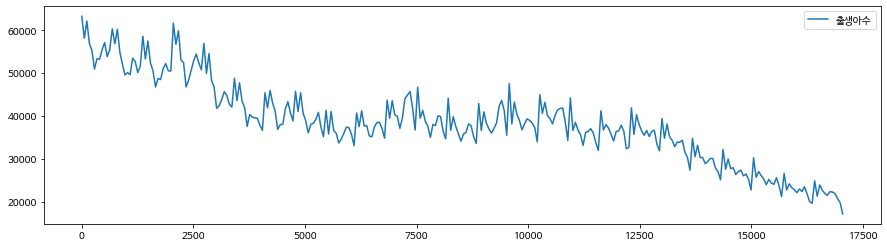

In [82]:
df_all.plot(figsize=(15,4)) # 판다스에서 제공하는 PLOT,, 인덱스 값이 x 축의 눈금을 잡히고 출생아 수는 y축으로 잡힙

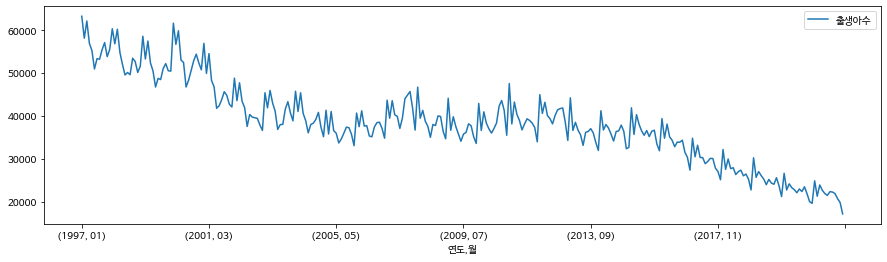

In [83]:
df_all.set_index(['연도','월']).plot(figsize=(15,4)) # y축을 설정하는건가??
# plt.show()

In [84]:
# df.info()

In [85]:
# 설정 인덱스를 원상복귀 시켜준다. (즉 연도와 월을 컬럼으로 되돌린다.)
df_all.reset_index(drop=True) # 인덱스가 없어짐

,시군구별,기간,출생아수,연도,월,성별
0,전국,1997.01,63268.0,1997,01,전체
1,전국,1997.02,58144.0,1997,02,전체
2,전국,1997.03,62160.0,1997,03,전체
3,전국,1997.04,56949.0,1997,04,전체
4,전국,1997.05,55270.0,1997,05,전체
...,...,...,...,...,...,...
295,전국,2021.08,22282.0,2021,08,전체
296,전국,2021.09,21905.0,2021,09,전체
297,전국,2021.10,20749.0,2021,10,전체
298,전국,2021.11,19829.0,2021,11,전체


In [86]:
df_all.head()

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268.0,1997,01,전체
58,전국,1997.02,58144.0,1997,02,전체
115,전국,1997.03,62160.0,1997,03,전체
172,전국,1997.04,56949.0,1997,04,전체
229,전국,1997.05,55270.0,1997,05,전체


In [87]:
df_all.iloc[:,0:] # 인덱스는 컬럼이 아니여서 이거를 포함해서 계산을 하면 안된다.

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268.0,1997,01,전체
58,전국,1997.02,58144.0,1997,02,전체
115,전국,1997.03,62160.0,1997,03,전체
172,전국,1997.04,56949.0,1997,04,전체
229,전국,1997.05,55270.0,1997,05,전체
...,...,...,...,...,...,...
16816,전국,2021.08,22282.0,2021,08,전체
16873,전국,2021.09,21905.0,2021,09,전체
16930,전국,2021.10,20749.0,2021,10,전체
16987,전국,2021.11,19829.0,2021,11,전체


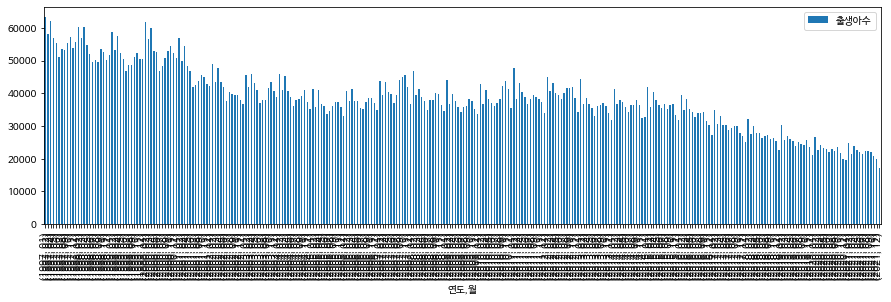

In [88]:
# 막대 그래프는 x 축에도 ㅇㄴ도, 월은 모두 표현한다.
# df_all.set_index(['연도','월']).plot(kind='bar', figsize=(15,4)) 
df_all.set_index(['연도','월']).plot.bar(figsize=(15,4)) 

In [89]:
# 최근 2년것만 가져오기
df_all[-24:]

,시군구별,기간,출생아수,연도,월,성별
15733,전국,2020.01,26646.0,2020,01,전체
15790,전국,2020.02,22759.0,2020,02,전체
15847,전국,2020.03,24190.0,2020,03,전체
15904,전국,2020.04,23299.0,2020,04,전체
15961,전국,2020.05,22847.0,2020,05,전체
16018,전국,2020.06,22117.0,2020,06,전체
16075,전국,2020.07,22999.0,2020,07,전체
16132,전국,2020.08,22402.0,2020,08,전체
16189,전국,2020.09,23499.0,2020,09,전체
16246,전국,2020.10,21884.0,2020,10,전체


In [90]:
df_all['연도'].unique()

array(['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021'], dtype=object)

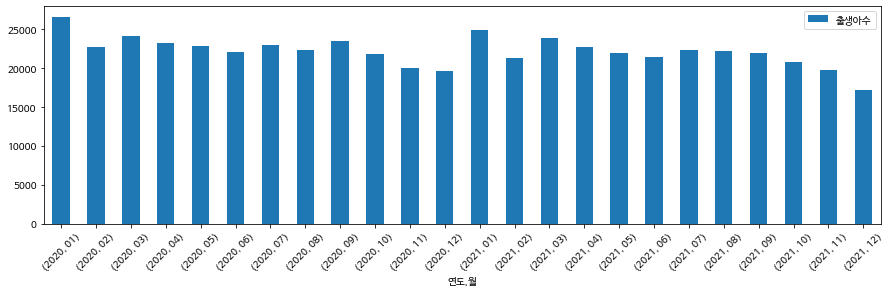

In [91]:
# 최근 2년 (24개만) 가져와서 그래프로 그려준다.
df_all[-24:].set_index(['연도', '월']).plot(kind='bar',figsize=(15,4), rot=45)
# plt.show()

In [92]:
# seaborn으로 생성하기

seaborn 통한 시각화

In [95]:
df_all

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268.0,1997,01,전체
58,전국,1997.02,58144.0,1997,02,전체
115,전국,1997.03,62160.0,1997,03,전체
172,전국,1997.04,56949.0,1997,04,전체
229,전국,1997.05,55270.0,1997,05,전체
...,...,...,...,...,...,...
16816,전국,2021.08,22282.0,2021,08,전체
16873,전국,2021.09,21905.0,2021,09,전체
16930,전국,2021.10,20749.0,2021,10,전체
16987,전국,2021.11,19829.0,2021,11,전체


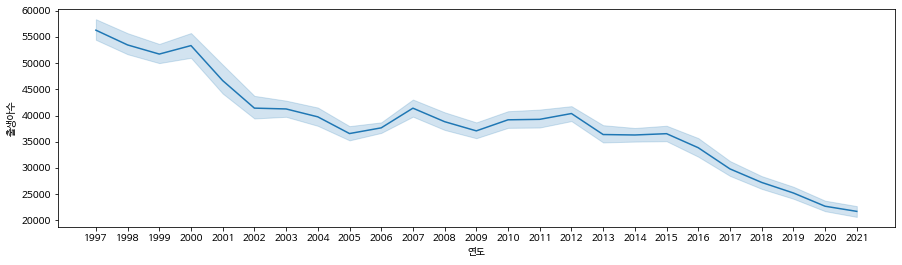

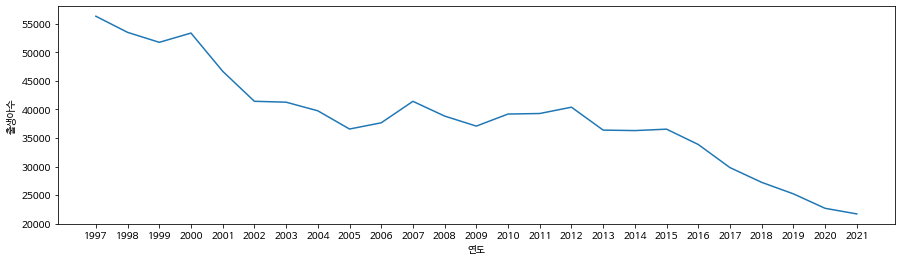

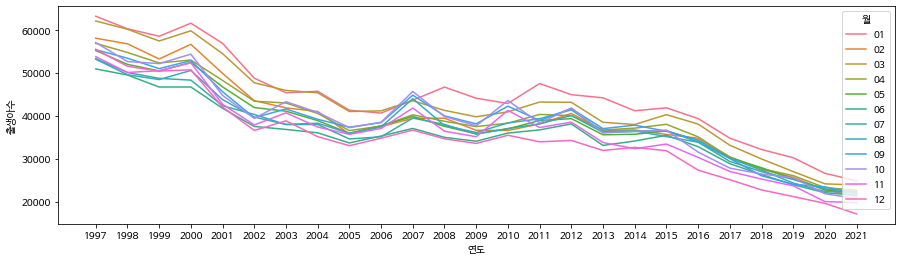

In [98]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_all, x='연도', y='출생아수')

plt.figure(figsize=(15,4))
sns.lineplot(data=df_all, x='연도', y='출생아수', ci=None)

plt.figure(figsize=(15,4))
sns.lineplot(data=df_all, x='연도', y='출생아수', ci=None, hue='월')

plt.show()

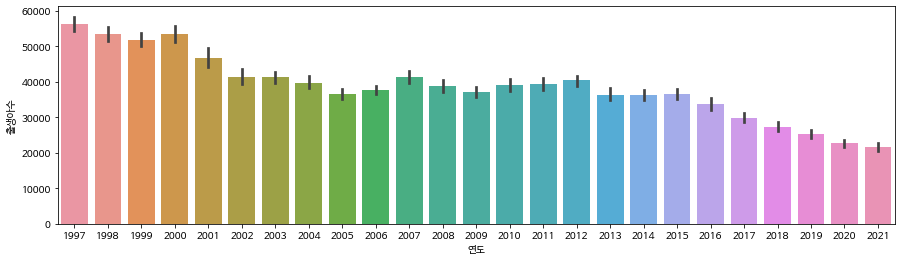

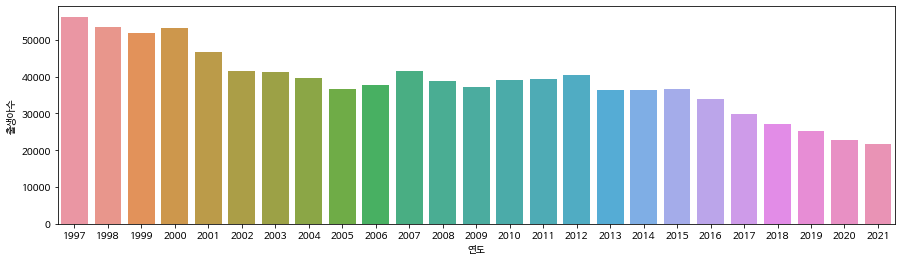

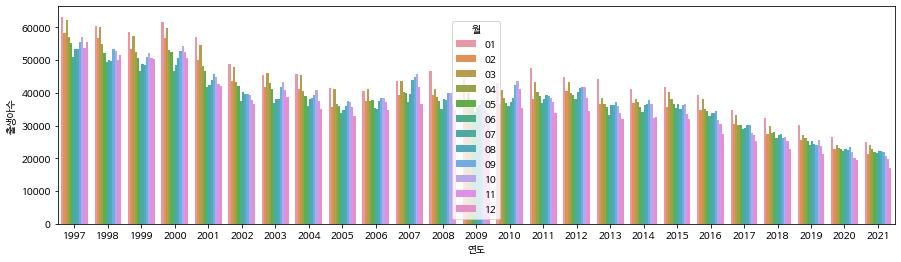

In [99]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_all, x='연도', y='출생아수')

plt.figure(figsize=(15,4))
sns.barplot(data=df_all, x='연도', y='출생아수', ci=None)

plt.figure(figsize=(15,4))
sns.barplot(data=df_all, x='연도', y='출생아수', ci=None, hue='월')

plt.show()

지역별 출생아수

In [100]:
df_local = df[df['시군구별'] != '전국'].copy()
df_local

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,1997.01,13205.0,1997,01,전체
3,부산광역시,1997.01,4201.0,1997,01,전체
4,대구광역시,1997.01,3345.0,1997,01,전체
5,인천광역시,1997.01,3646.0,1997,01,전체
6,광주광역시,1997.01,2166.0,1997,01,전체
...,...,...,...,...,...,...
17095,전라북도,2021.12.2,244.0,2021,12,여
17096,전라남도,2021.12.2,261.0,2021,12,여
17097,경상북도,2021.12.2,382.0,2021,12,여
17098,경상남도,2021.12.2,478.0,2021,12,여


In [112]:
df_local['시군구별'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

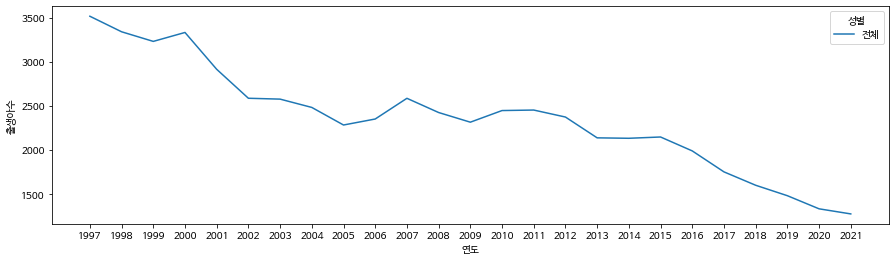

In [106]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_local, x='연도', y='출생아수', hue='성별', ci=None)

plt.show()

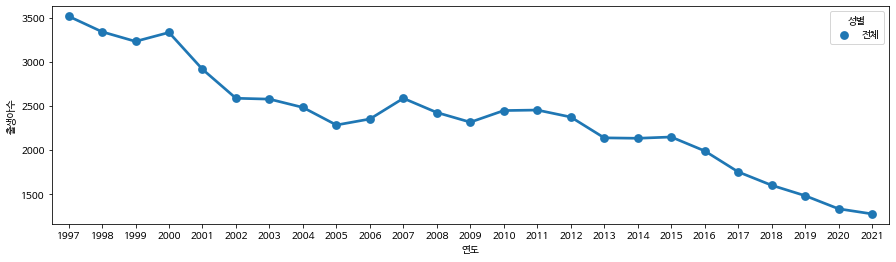

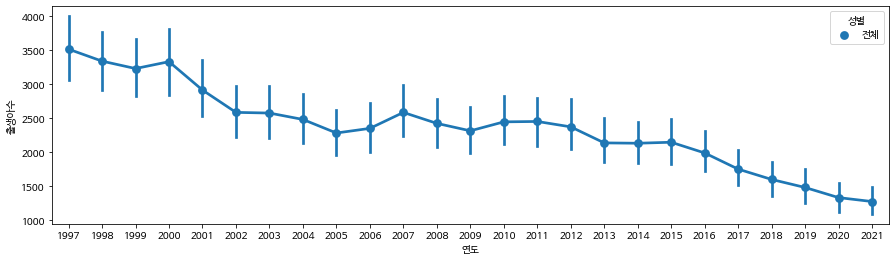

In [109]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_local, x='연도', y='출생아수', hue='성별', ci=None)

plt.figure(figsize=(15,4))
sns.pointplot(data=df_local, x='연도', y='출생아수', hue='성별' )

plt.show()

In [105]:
df_local = df_local[df['성별']=='전체']
df_local.head()

<ipython-input-105-ab8deff3a083>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_local = df_local[df['성별']=='전체']


,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,1997.01,13205.0,1997,01,전체
3,부산광역시,1997.01,4201.0,1997,01,전체
4,대구광역시,1997.01,3345.0,1997,01,전체
5,인천광역시,1997.01,3646.0,1997,01,전체
6,광주광역시,1997.01,2166.0,1997,01,전체


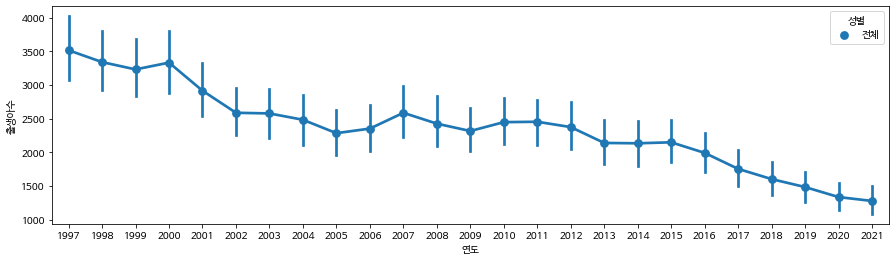

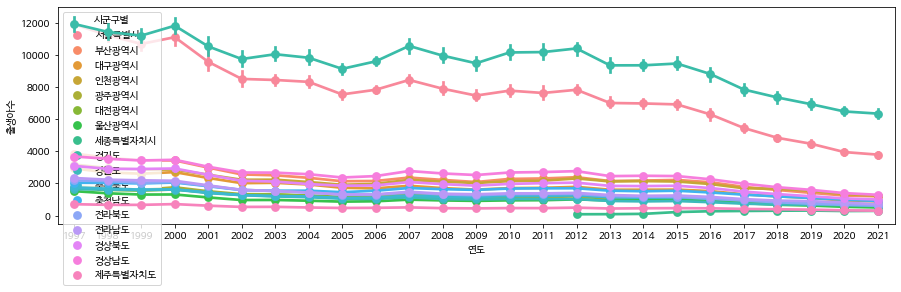

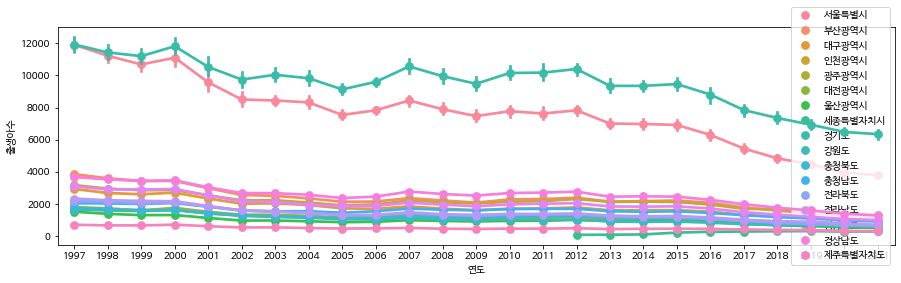

In [111]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_local, x='연도', y='출생아수', hue='성별')

plt.figure(figsize=(15,4))
sns.pointplot(data=df_local, x='연도', y='출생아수', hue='시군구별')

plt.figure(figsize=(15,4))
sns.pointplot(data=df_local, x='연도', y='출생아수', hue='시군구별')
plt.legend(loc='center right')

In [110]:
df_local['성별'].unique()

array(['전체'], dtype=object)

In [113]:
df_loc_2=df_local[df_local['시군구별'].isin(['서울특별시','경기도','세종특별자치시'])]

In [114]:
df_loc_2=df_local[df_local['시군구별'].isin(['서울특별시','경기도','세종특별자치시'])]
df_loc_2.head()

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,1997.01,13205.0,1997,01,전체
9,세종특별자치시,1997.01,NaN,1997,01,전체
10,경기도,1997.01,13440.0,1997,01,전체
59,서울특별시,1997.02,12239.0,1997,02,전체
66,세종특별자치시,1997.02,NaN,1997,02,전체


In [115]:
df_loc_2['시군구별'].unique()

array(['서울특별시', '세종특별자치시', '경기도'], dtype=object)

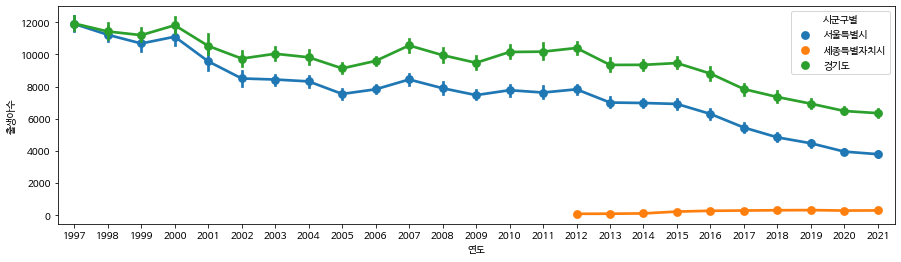

In [117]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_loc_2, x='연도', y='출생아수', hue='시군구별')

In [118]:
df_loc_3=df_loc_2[df_loc_2['시군구별']=='세종특별자치시'].dropna() # null값 모두 삭제
df_loc_3.head()

,시군구별,기간,출생아수,연도,월,성별
10269,세종특별자치시,2012.01,73.0,2012,01,전체
10326,세종특별자치시,2012.02,74.0,2012,02,전체
10383,세종특별자치시,2012.03,92.0,2012,03,전체
10440,세종특별자치시,2012.04,84.0,2012,04,전체
10497,세종특별자치시,2012.05,72.0,2012,05,전체


In [119]:
df_loc_3['시군구별'].unique()

array(['세종특별자치시'], dtype=object)

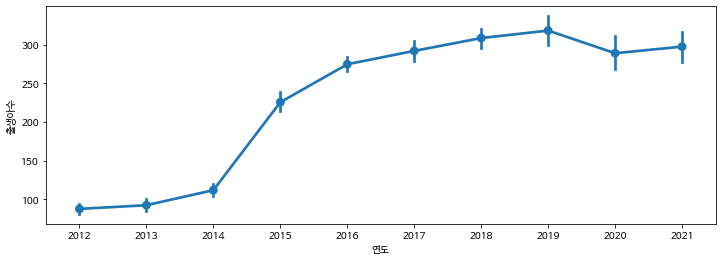

In [122]:
plt.figure(figsize=(12,4))
sns.pointplot(data=df_loc_3, x='연도', y='출생아수')